In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")

In [5]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [7]:
data.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
562,134-54-4720,B,Mandalay,Normal,Female,Electronic accessories,42.42,8,16.9680,356.3280,1/30/2019,13:58,Ewallet,339.36,4.761905,16.9680,5.7
367,468-88-0009,A,Yangon,Member,Male,Home and lifestyle,65.94,4,13.1880,276.9480,3/24/2019,10:29,Cash,263.76,4.761905,13.1880,6.0
800,751-15-6198,B,Mandalay,Normal,Male,Sports and travel,23.01,6,6.9030,144.9630,1/12/2019,16:45,Ewallet,138.06,4.761905,6.9030,7.9
616,327-40-9673,B,Mandalay,Member,Male,Sports and travel,72.60,6,21.7800,457.3800,1/13/2019,19:51,Cash,435.60,4.761905,21.7800,6.9
656,250-81-7186,C,Naypyitaw,Normal,Female,Electronic accessories,99.69,1,4.9845,104.6745,2/27/2019,10:23,Credit card,99.69,4.761905,4.9845,8.0


In [8]:
data.shape

(1000, 17)

In [9]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

<AxesSubplot: xlabel='Branch', ylabel='count'>

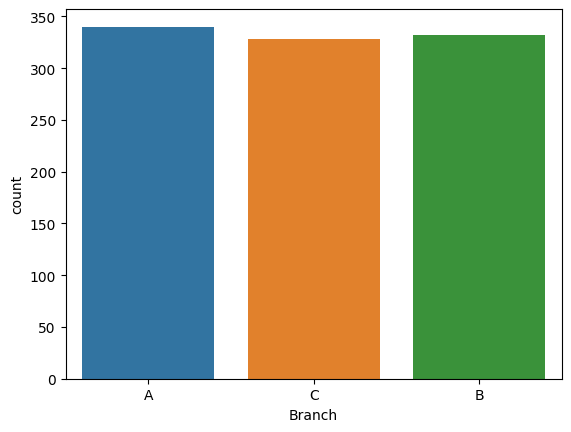

In [11]:
sns.countplot(data = data, x = 'Branch')

In [12]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


<AxesSubplot: xlabel='Branch', ylabel='count'>

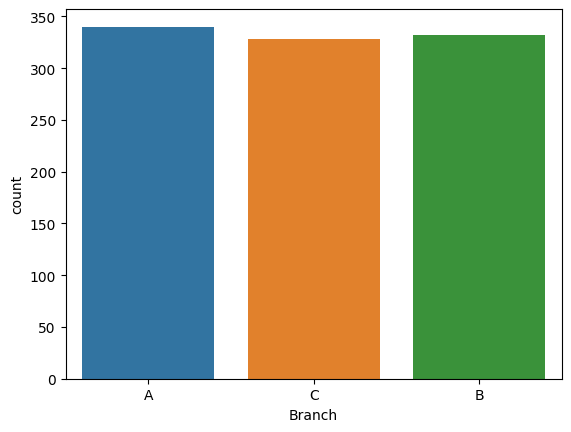

In [13]:
sns.countplot(data = data, x = 'Branch')

In [14]:
data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

<AxesSubplot: ylabel='Total'>

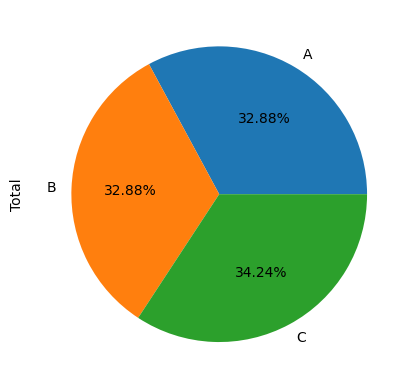

In [15]:
data.groupby('Branch').sum()['Total'].plot(kind="pie", autopct ="%1.2f%%")

In [16]:
data.groupby('Branch').sum()['Total']

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

In [17]:
data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

<AxesSubplot: ylabel='Payment'>

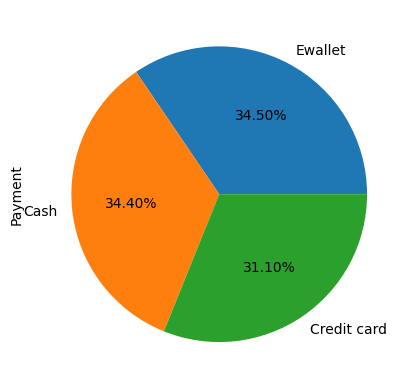

In [18]:
data['Payment'].value_counts().plot(kind="pie", autopct="%1.2f%%")

<AxesSubplot: xlabel='Payment', ylabel='count'>

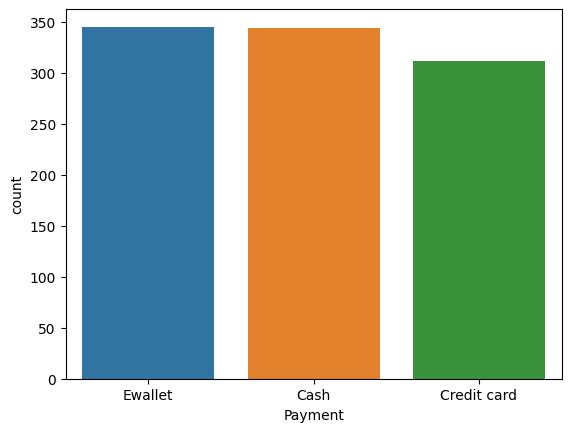

In [19]:
sns.countplot(data = data, x = 'Payment')

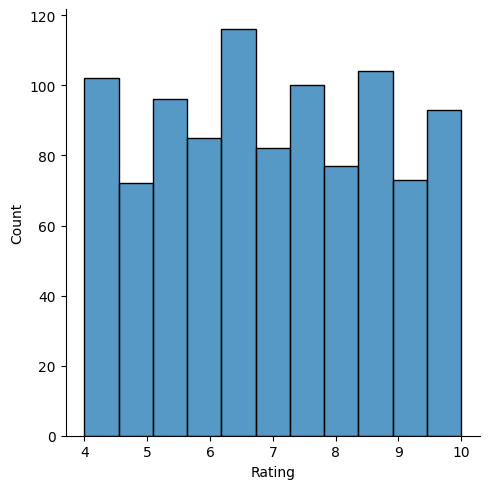

In [20]:
sns.displot(data['Rating'])

In [21]:
data['Rating'].skew()

0.00900964876573073

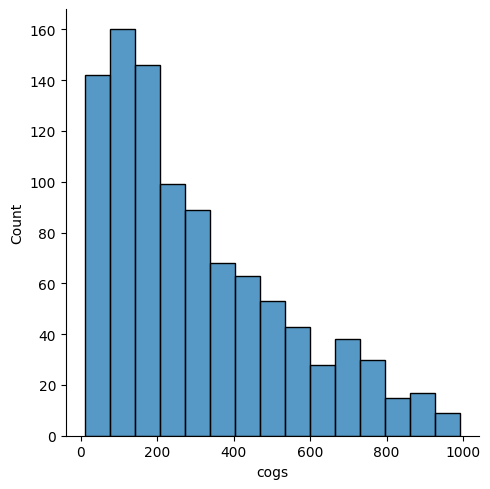

In [22]:
sns.displot(data['cogs'])

<AxesSubplot: >

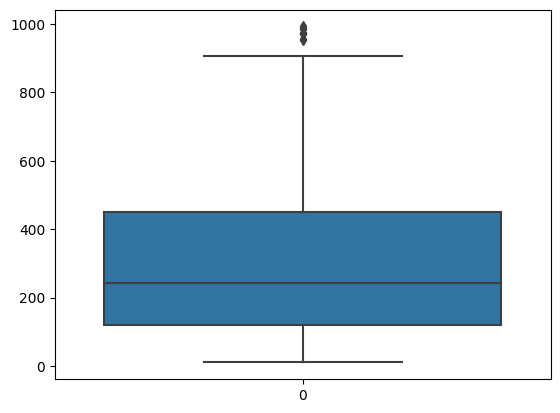

In [23]:
sns.boxplot(data['cogs'])

In [24]:
data['cogs'].skew()

0.8925698049581418

<AxesSubplot: xlabel='cogs', ylabel='Rating'>

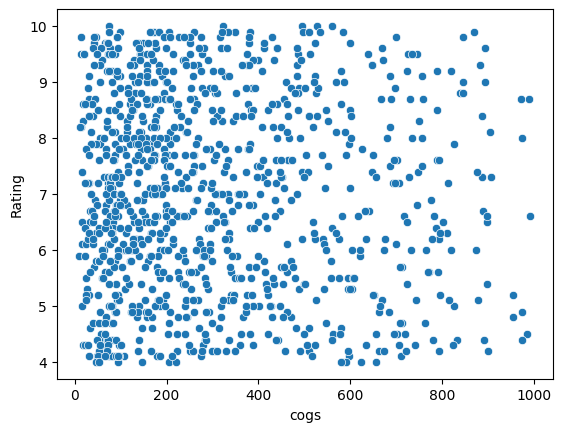

In [25]:
sns.scatterplot(data = data, x = "cogs", y = "Rating")

<AxesSubplot: xlabel='gross income', ylabel='Rating'>

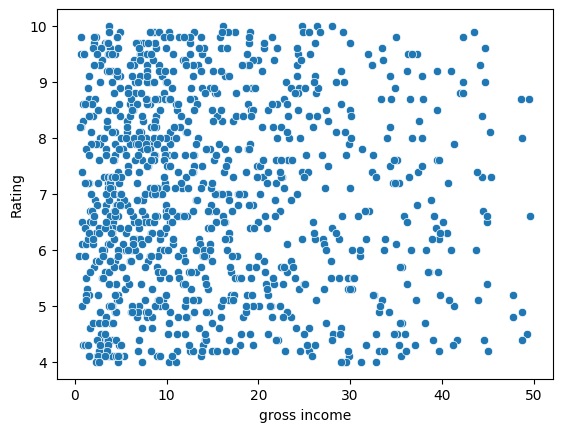

In [26]:
sns.scatterplot(data=data, x = "gross income", y ="Rating")

<AxesSubplot: xlabel='Branch', ylabel='gross income'>

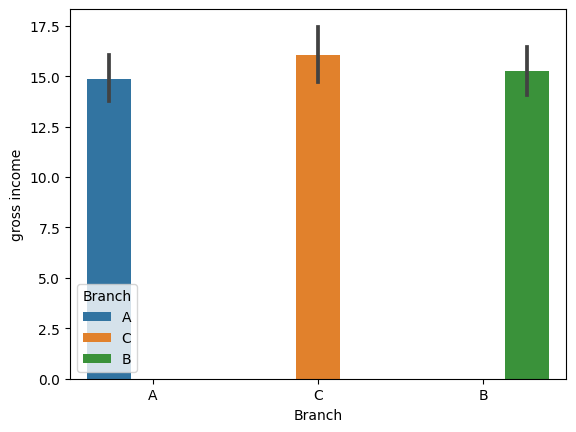

In [27]:
sns.barplot(data = data, x = "Branch", y = "gross income", hue="Branch")

<AxesSubplot: xlabel='Gender', ylabel='gross income'>

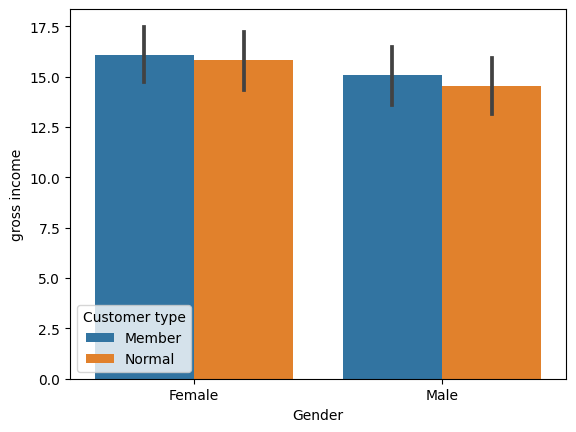

In [28]:
sns.barplot(data = data, x = "Gender", y = "gross income", hue = "Customer type")

<AxesSubplot: xlabel='Gender', ylabel='gross income'>

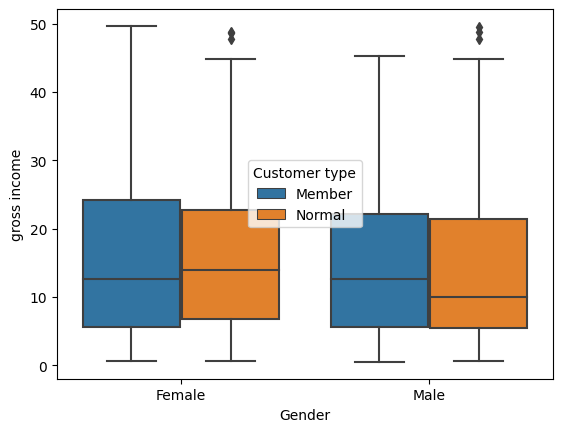

In [29]:
sns.boxplot(data = data, x = "Gender", y = "gross income", hue = "Customer type")

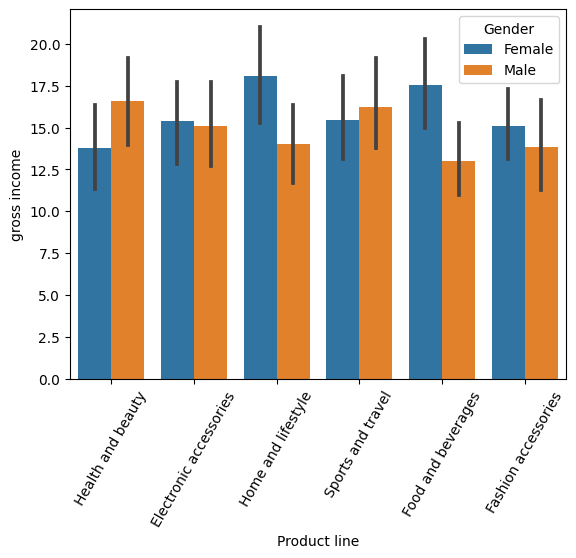

In [30]:
sns.barplot(data = data, x = "Product line", y = "gross income", hue = "Gender")
plt.xticks(rotation = 60)
plt.show()

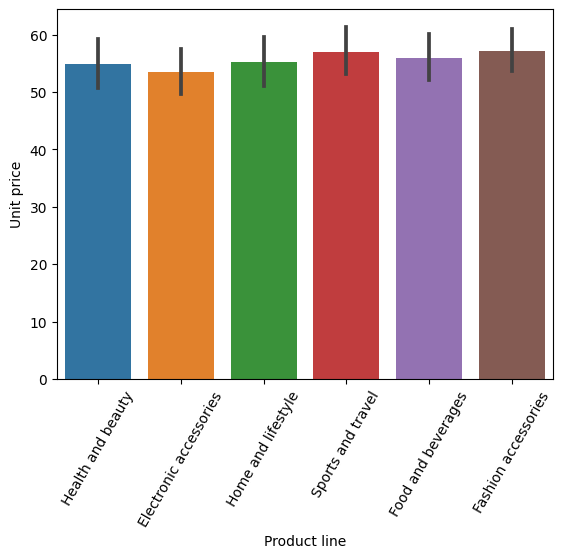

In [31]:
sns.barplot(data = data, x = "Product line", y = "Unit price")
plt.xticks(rotation = 60)
plt.show()

In [32]:
pd.crosstab(data['City'], data['Payment'])

Payment,Cash,Credit card,Ewallet
City,,,
Mandalay,110,109,113
Naypyitaw,124,98,106
Yangon,110,104,126


<AxesSubplot: xlabel='Payment', ylabel='City'>

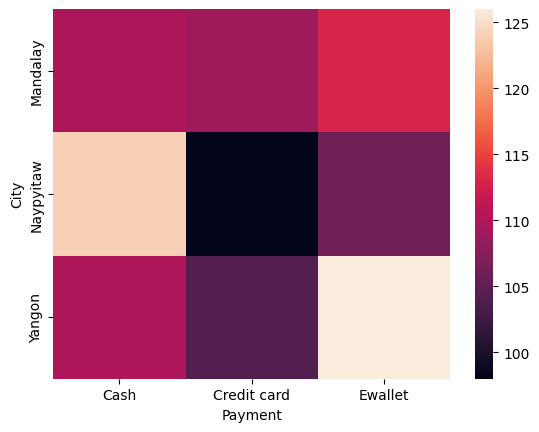

In [33]:
sns.heatmap(pd.crosstab(data['City'], data['Payment']))

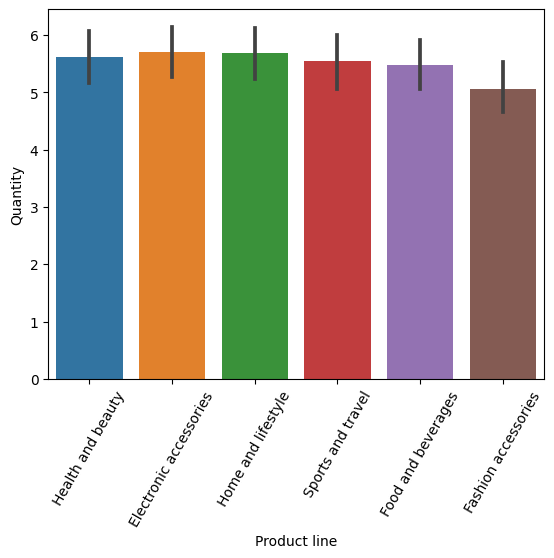

In [34]:
sns.barplot(data = data, x = "Product line", y = "Quantity")
plt.xticks(rotation = 60)
plt.show()